<a href="https://colab.research.google.com/github/FarelTech/Metode-Numerik-Tugas-2-FarelDR/blob/main/MetNumTugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

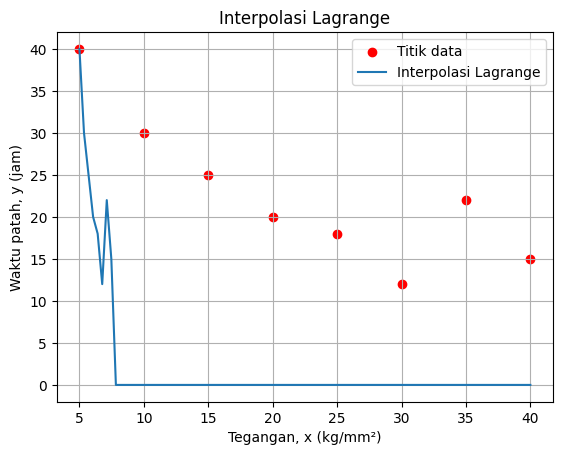

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def interpolasi_lagrange(x, y, xi):
    """
    Melakukan interpolasi Lagrange.
    x : array-like, shape (n,)
        x-koordinat dari titik data.
    y : array-like, shape (n,)
        y-koordinat dari titik data.
    xi : array-like, shape (m,)
        x-koordinat dari titik interpolasi.
    """
    def L(k, x):
        """Polinom basis Lagrange"""
        terms = [(x - xj) / (x[k] - xj) for j, xj in enumerate(x) if j != k]
        return np.prod(terms, axis=0)

    yi = np.zeros_like(xi, dtype=float)
    for k in range(len(y)):
        yi += y[k] * L(k, xi)
    return yi

# Data yang diberikan
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 20, 18, 12, 22, 15])

# Titik-titik interpolasi
xi = np.linspace(5, 40, 100)

# Melakukan interpolasi Lagrange
yi = interpolasi_lagrange(x, y, xi)

# Plot hasil interpolasi
plt.scatter(x, y, color='red', label='Titik data')
plt.plot(xi, yi, label='Interpolasi Lagrange')
plt.xlabel('Tegangan, x (kg/mm²)')
plt.ylabel('Waktu patah, y (jam)')
plt.legend()
plt.title('Interpolasi Lagrange')
plt.grid(True)
plt.show()


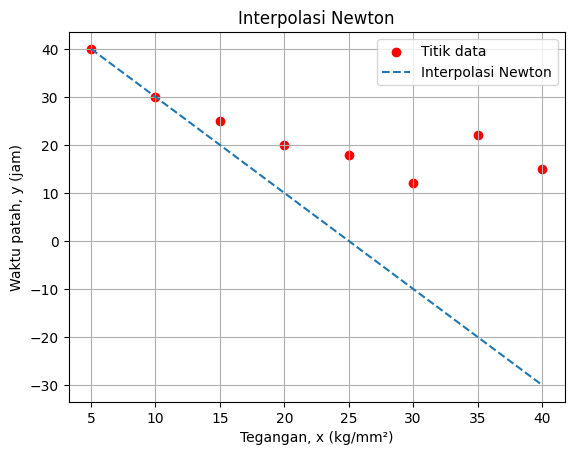

In [2]:
def interpolasi_newton(x, y, xi):
    """
    Melakukan interpolasi Newton.
    x : array-like, shape (n,)
        x-koordinat dari titik data.
    y : array-like, shape (n,)
        y-koordinat dari titik data.
    xi : array-like, shape (m,)
        x-koordinat dari titik interpolasi.
    """
    def beda_terbagi(x, y):
        """Menghitung beda terbagi"""
        n = len(y)
        coef = np.copy(y)
        for j in range(1, n):
            for i in range(n - 1, j - 1, -1):
                coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
        return coef

    def polinom_newton(coef, x_data, xi):
        """Evaluasi polinom Newton pada titik xi"""
        n = len(coef) - 1
        p = coef[n]
        for k in range(1, n + 1):
            p = coef[n - k] + (xi - x_data[n - k]) * p
        return p

    coef = beda_terbagi(x, y)
    yi = polinom_newton(coef, x, xi)
    return yi

# Melakukan interpolasi Newton
yi_newton = interpolasi_newton(x, y, xi)

# Plot hasil interpolasi
plt.scatter(x, y, color='red', label='Titik data')
plt.plot(xi, yi_newton, label='Interpolasi Newton', linestyle='--')
plt.xlabel('Tegangan, x (kg/mm²)')
plt.ylabel('Waktu patah, y (jam)')
plt.legend()
plt.title('Interpolasi Newton')
plt.grid(True)
plt.show()
